## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
from sklearn import datasets, metrics

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

D:\Tools\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


## Boston data

In [2]:
boston = datasets.load_boston()

boston.target[0:20]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2])

In [3]:
test_size = 0.25
rnd_seed = 1234
cv = 10

In [7]:
from sklearn.model_selection import cross_val_score 

x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=test_size, random_state=rnd_seed)

model_decision_tree = DecisionTreeRegressor(random_state=rnd_seed)

model_decision_tree.fit(x_train, y_train)

y_pred = model_decision_tree.predict(x_test)

base_mse = metrics.mean_squared_error(y_test, y_pred)
base_r2 = metrics.r2_score(y_test, y_pred)

print('Regression Tree')
print(f'R2: {base_r2}')
print(f'MSE: {base_mse}')

Regression Tree
R2: 0.8575112137692344
MSE: 14.571496062992127


In [5]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()

model_lr.fit(x_train, y_train)

y_pred = model_lr.predict(x_test)

mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print('Linear Regression')
print(f'R2: {r2}')
print(f'MSE: {mse}')

Linear Regression
R2: 0.7325732922440753
MSE: 27.34816768593556


## Try: max_depth

In [20]:
import matplotlib.pyplot as plt

mse_list = []
r2_list = []

max_depth_list = [i for i in range(1, 20, 1)]

for depth in max_depth_list:

    model_decision_tree = DecisionTreeRegressor(max_depth = depth, random_state=rnd_seed)

    model_decision_tree.fit(x_train, y_train)

    y_pred = model_decision_tree.predict(x_test)

    mse_list.append(metrics.mean_squared_error(y_test, y_pred))
    r2_list.append(metrics.r2_score(y_test, y_pred))

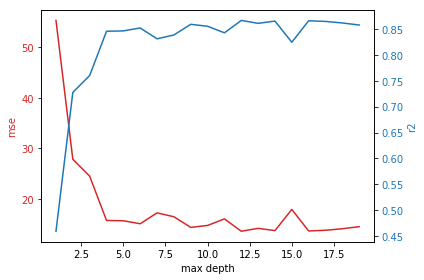

In [21]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('max depth')
ax1.set_ylabel('mse', color=color)
ax1.plot(max_depth_list, mse_list, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('r2', color=color)  # we already handled the x-label with ax1
ax2.plot(max_depth_list, r2_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Try: min_samples_split

In [31]:
mse_list = []
r2_list = []

samples_split_list = [i for i in range(2, 20, 1)]

for samples_split in samples_split_list:

    model_decision_tree = DecisionTreeRegressor(min_samples_split = samples_split, random_state=rnd_seed)

    model_decision_tree.fit(x_train, y_train)

    y_pred = model_decision_tree.predict(x_test)

    mse_list.append(metrics.mean_squared_error(y_test, y_pred))
    r2_list.append(metrics.r2_score(y_test, y_pred))

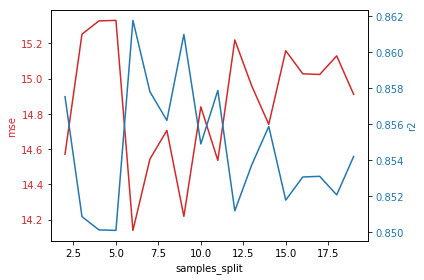

In [32]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('samples_split')
ax1.set_ylabel('mse', color=color)
ax1.plot(samples_split_list, mse_list, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('r2', color=color)  # we already handled the x-label with ax1
ax2.plot(samples_split_list, r2_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Try: min_samples_leaf

In [33]:
mse_list = []
r2_list = []

samples_leaf_list = [i for i in range(1, 20, 1)]

for samples_leaf in samples_leaf_list:

    model_decision_tree = DecisionTreeRegressor(min_samples_leaf = samples_leaf, random_state=rnd_seed)

    model_decision_tree.fit(x_train, y_train)

    y_pred = model_decision_tree.predict(x_test)

    mse_list.append(metrics.mean_squared_error(y_test, y_pred))
    r2_list.append(metrics.r2_score(y_test, y_pred))

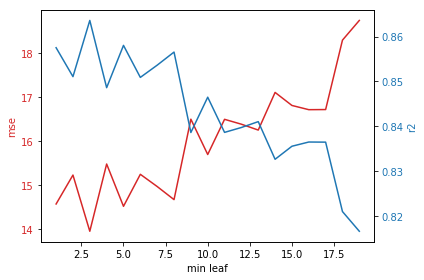

In [34]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('min leaf')
ax1.set_ylabel('mse', color=color)
ax1.plot(samples_leaf_list, mse_list, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('r2', color=color)  # we already handled the x-label with ax1
ax2.plot(samples_leaf_list, r2_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [35]:
max_depth = 4
min_samples_split = 6
min_samples_leaf = 3

model_decision_tree = DecisionTreeRegressor(max_depth=max_depth,
                                            min_samples_split=min_samples_split,
                                            min_samples_leaf=min_samples_leaf, random_state=rnd_seed)

model_decision_tree.fit(x_train, y_train)

y_pred = model_decision_tree.predict(x_test)

print(f'mse: {metrics.mean_squared_error(y_test, y_pred)}')

print(f'r2: {metrics.r2_score(y_test, y_pred)}')

mse: 15.078677819945334
r2: 0.8525516878129265
